In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import zipfile
import scipy.stats

### Problem 1
In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared.

#### Problem 1(a)
Load in these CSV files from the Sean Lahman's Baseball Database. For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas DataFrame and show the head of each table.

Hint Use the requests, StringIO and zipfile modules to get from the web.

In [10]:
url='http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip'
g = requests.get(url).content
s = io.BytesIO(g)
z = zipfile.ZipFile(s,'r')

In [11]:
print(z.namelist()) 

['SchoolsPlayers.csv', 'SeriesPost.csv', 'Teams.csv', 'TeamsFranchises.csv', 'TeamsHalf.csv', 'AllstarFull.csv', 'Appearances.csv', 'AwardsManagers.csv', 'AwardsPlayers.csv', 'AwardsShareManagers.csv', 'AwardsSharePlayers.csv', 'Batting.csv', 'BattingPost.csv', 'Fielding.csv', 'FieldingOF.csv', 'FieldingPost.csv', 'HallOfFame.csv', 'Managers.csv', 'ManagersHalf.csv', 'Master.csv', 'Pitching.csv', 'PitchingPost.csv', 'readme2013.txt', 'Salaries.csv', 'Schools.csv']


In [18]:
z.printdir() 

File Name                                             Modified             Size
SchoolsPlayers.csv                             2013-12-04 14:15:40       180758
SeriesPost.csv                                 2013-12-05 22:30:18         8883
Teams.csv                                      2014-01-27 22:59:04       537313
TeamsFranchises.csv                            2013-12-04 14:15:40         3359
TeamsHalf.csv                                  2013-12-04 14:15:40         1609
AllstarFull.csv                                2013-12-05 22:36:24       201742
Appearances.csv                                2013-12-06 17:04:36      5816593
AwardsManagers.csv                             2014-01-31 09:57:46         7736
AwardsPlayers.csv                              2013-12-06 17:54:22       242812
AwardsShareManagers.csv                        2014-02-10 22:43:04        16878
AwardsSharePlayers.csv                         2013-12-04 14:15:38       222952
Batting.csv                             

In [14]:
tables = z.namelist() 

In [17]:
salary = pd.read_csv(z.open(tables[tables.index('Salaries.csv')]))
team = pd.read_csv(z.open(tables[tables.index('Teams.csv')]))

In [19]:
salary.head() 

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [22]:
team = team[['yearID','teamID','W']]
team.head()

,yearID,teamID,W
0,1871,PH1,21
1,1871,CH1,19
2,1871,BS1,20
3,1871,WS3,15
4,1871,NY2,16


#### Problem 1(b)
Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame.

In [26]:
total_salaries = salary.groupby(['teamID','yearID'])['salary'].sum().reset_index()
total_salaries.head() 

,teamID,yearID,salary
0,ANA,1997,31135472
1,ANA,1998,41281000
2,ANA,1999,55388166
3,ANA,2000,51464167
4,ANA,2001,47535167


#### Problem 1(c)
Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame showing wins and total salaries for each team for each year. Show the head of the new merged DataFrame.

In [29]:
total_salaries.isna().sum()

teamID    0
yearID    0
salary    0
dtype: int64

In [32]:
wins_salaries = pd.merge(total_salaries, team, on=['teamID','yearID']) 
wins_salaries.head()

,teamID,yearID,salary,W
0,ANA,1997,31135472,84
1,ANA,1998,41281000,85
2,ANA,1999,55388166,70
3,ANA,2000,51464167,82
4,ANA,2001,47535167,75


In [33]:
wins_salaries.isna().sum() 

teamID    0
yearID    0
salary    0
W         0
dtype: int64

#### Problem 1(d)
How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end?

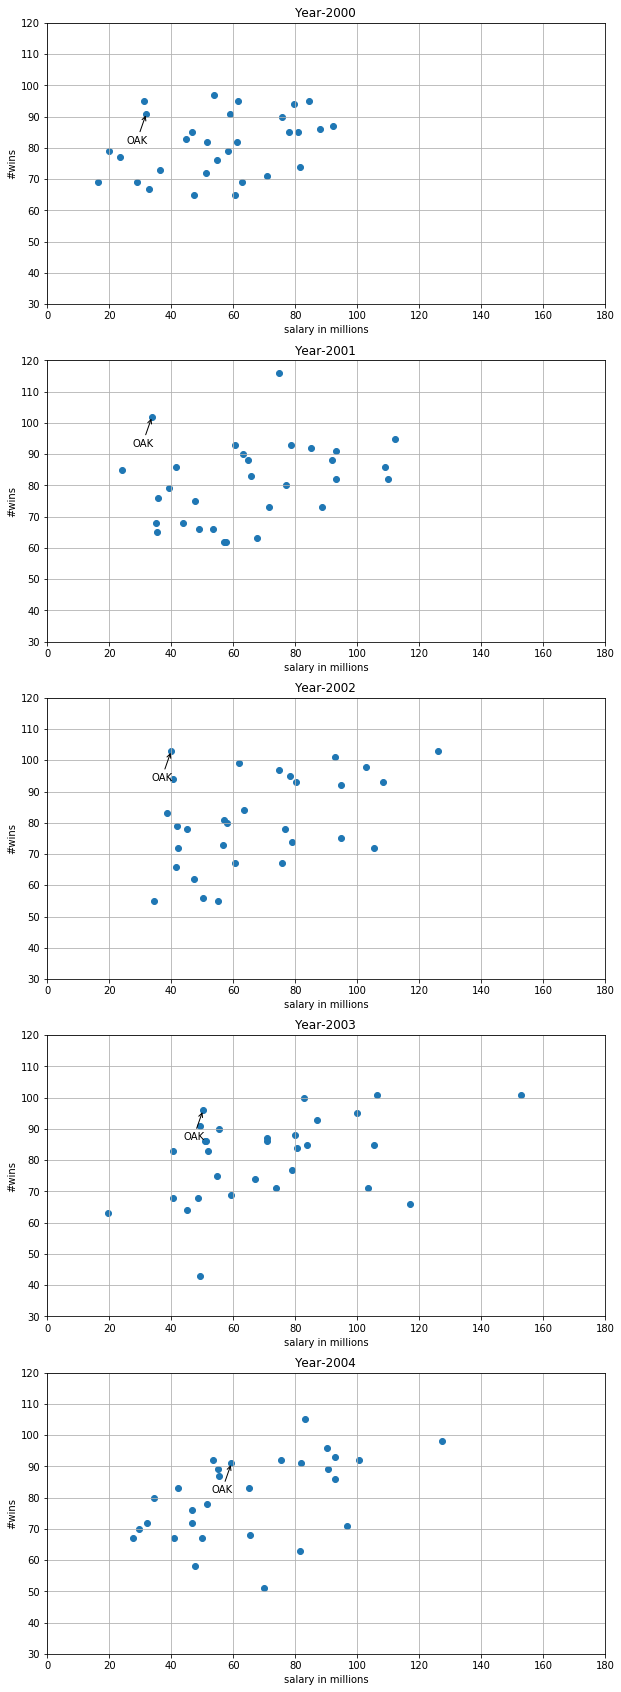

In [98]:
years = np.arange(2000,2005)
fig, ax = plt.subplots(len(years), figsize=(10,30)) 
for i,j in enumerate(years): 
    temp = wins_salaries.loc[wins_salaries.yearID == j]
    ax[i].set_title(f'Year-{j}')
    ax[i].scatter(temp.salary/1e6, temp.W)
    ax[i].set_xlabel('salary in millions')
    ax[i].set_ylabel('#wins')
    ax[i].set_xlim(0,180)
    ax[i].set_ylim(30,120)
    ax[i].grid()
    x = temp.loc[temp.teamID=='OAK', ('W',"salary")].reset_index()
    ax[i].annotate('OAK', xy=(x['salary'][0]/1e6, x['W'][0]), xytext=(-20,-30),textcoords = 'offset points',arrowprops = dict(arrowstyle='->'))

We see a competitive advantage can be detected in years 2001-2003 for the Oakland baseball team, because in those years Oakland spent much less in salary compared to other teams, but stood out with the number of wins.

### Problem 2
In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below.

#### Problem 2(a)
Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y. If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a?

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y.

In [106]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""


def ratioNormals(diff, a):
    X = scipy.stats.norm(loc=diff, scale=1)
    Y = scipy.stats.norm(loc=0, scale=1) 
    return X.sf(a) / Y.sf(a) 

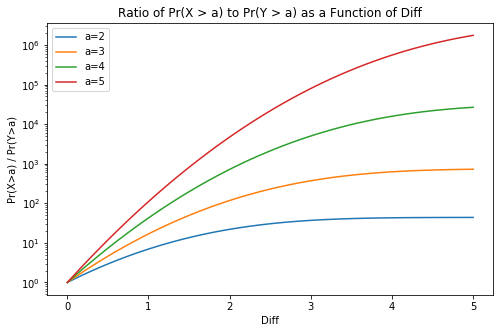

In [112]:
# let diff range from 0 to 5 
diffs = np.linspace(0, 5, 50)
a_values = range(2,6)

# Plot separate curves for 
# Pr(X > a) / Pr(Y > a) as a function of diff
# for all given values of a
plt.figure(figsize=(8,5));
for a in a_values:
    ratios = [ratioNormals(diff, a) for diff in diffs]
    plt.plot(diffs, ratios)
    
# Labels
plt.legend(["a={}".format(a) for a in a_values], loc=0)
plt.xlabel('Diff')
plt.ylabel('Pr(X>a) / Pr(Y>a)')
plt.title('Ratio of Pr(X > a) to Pr(Y > a) as a Function of Diff')

plt.yscale('log') 